# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Supervisionada
## Projeto 2: Construindo um Sistema de Intervenção para Estudantes

Bem-vindo ao segundo projeto do Nanodegree de Machine Learning! Neste Notebook, alguns templates de código já foram fornecidos, e será o seu trabalho implementar funcionalidades necessárias para completar este projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código que se segue precisará de funcionalidades adicionais que você deve fornecer. Instruções serão providenciadas para cada seção e as especificações para cada implementação estarão marcadas no bloco de código com o comando `'TODO'`. Tenha certeza de ler atentamente todas as instruções!

Além do código implementado, haverá questões relacionadas ao projeto e à implementação que você deve responder. Cada seção em que você tem que responder uma questão será antecedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e escreva respostas completas nas caixas de texto subsequentes que começam com **'Resposta: '**. O projeto enviado será avaliado baseado nas respostas para cada questão e a implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas, um clique duplo na célula entra no modo de edição.

### Questão 1 - Classificação versus Regressão
*Seu objetivo neste projeto é identificar estudantes que possam precisar de intervenção antecipada antes de serem reprovados. Que tipo de problema de aprendizagem supervisionada é esse: classificação ou regressão? Por quê?*

**Resposta: **

Classificação prevê qual classe discreta uma entidade pertence e regressão prevê valores continuos da mesma. Por se tratar de uma variável discreta, o problema se trata de classificação.

## Observando os Dados
Execute a célula de código abaixo para carregar as bibliotecas de Python necessárias e os dados sobre os estudantes. Note que a última coluna desse conjunto de dados, `'passed'`, será nosso rótulo alvo (se o aluno foi ou não aprovado). As outras colunas são atributos sobre cada aluno.

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Ler os dados dos estudantes
student_data = pd.read_csv("student-data.csv")
print "Os dados dos estudantes foram lidos com êxito!"

Os dados dos estudantes foram lidos com êxito!


### Implementação: Observando os Dados
Vamos começar observando o conjunto de dados para determinar quantos são os estudantes sobre os quais temos informações e entender a taxa de graduação entre esses estudantes. Na célula de código abaixo, você vai precisar calcular o seguinte:
- O número total de estudantes, `n_students`.
- O número total de atributos para cada estudante, `n_features`.
- O número de estudantes aprovados, `n_passed`.
- O número de estudantes reprovados, `n_failed`.
- A taxa de graduação da classe, `grad_rate`, em porcentagem (%).


In [24]:
# TODO: Calcule o número de estudante
n_students = len(student_data)

# TODO: Calcule o número de atributos
n_features = len(student_data.columns) - 1

# TODO: Calcule o número de alunos aprovados
n_passed = len(student_data[student_data.passed == 'yes'])

# TODO: Calcule o número de alunos reprovados
n_failed = len(student_data[student_data.passed == 'no'])

# TODO: Calcule a taxa de graduação
grad_rate = float(n_passed) / n_students * 100

# Imprima os resultados
print "Número total de estudantes: {}".format(n_students)
print "Número de atributos: {}".format(n_features)
print "Número de estudantes aprovados: {}".format(n_passed)
print "Número de estudantes reprovados: {}".format(n_failed)
print "Taxa de graduação: {:.2f}%".format(grad_rate)

Número total de estudantes: 395
Número de atributos: 30
Número de estudantes aprovados: 265
Número de estudantes reprovados: 130
Taxa de graduação: 67.09%


## Preparando os Dados
Nesta seção, vamos preparara os dados para modelagem, treinamento e teste.

### Identificar atributos e variáveis-alvo
É comum que os dados que você obteve contenham atributos não numéricos. Isso pode ser um problema, dado que a maioria dos algoritmos de machine learning esperam dados númericos para operar cálculos.

Execute a célula de código abaixo para separar os dados dos estudantes em atributos e variáveis-alvo e verificar se algum desses atributos é não numérico.

In [3]:
# Extraia as colunas dos atributo
feature_cols = list(student_data.columns[:-1])

# Extraia a coluna-alvo 'passed'
target_col = student_data.columns[-1] 

# Mostre a lista de colunas
print "Colunas de atributos:\n{}".format(feature_cols)
print "\nColuna-alvo: {}".format(target_col)

# Separe os dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Mostre os atributos imprimindo as cinco primeiras linhas
print "\nFeature values:"
print X_all.head()


Colunas de atributos:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Coluna-alvo: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Pré-processar Colunas de Atributo

Como você pode ver, há muitas colunas não numéricas que precisam ser convertidas! Muitas delas são simplesmente `yes`/`no`, por exemplo, a coluna `internet`. É razoável converter essas variáveis em valores (binários) `1`/`0`.

Outras colunas, como `Mjob` e `Fjob`, têm mais do que dois valores e são conhecidas como variáveis categóricas. A maneira recomendada de lidar com esse tipo de coluna é criar uma quantidade de colunas proporcional aos possíveis valores (por exemplo, `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc), e assinalar `1` para um deles e `0` para todos os outros.

Essas colunas geradas são por vezes chamadas de _variáveis postiças_ (_dummy variables_), e nós iremos utilizar a função [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para fazer essa conversão. Execute a célula de código abaixo para executar a rotina de pré-processamento discutida nesta seção.

In [4]:
def preprocess_features(X):
    ''' Pré-processa os dados dos estudantes e converte as variáveis binárias não numéricas em
        variáveis binárias (0/1). Converte variáveis categóricas em variáveis postiças. '''
    
    # Inicialize nova saída DataFrame
    output = pd.DataFrame(index = X.index)

    # Observe os dados em cada coluna de atributos 
    for col, col_data in X.iteritems():
        
        # Se o tipo de dado for não numérico, substitua todos os valores yes/no por 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # Se o tipo de dado for categórico, converta-o para uma variável dummy
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Reúna as colunas revisadas
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementação: Divisão dos Dados de Treinamento e Teste
Até agora, nós convertemos todos os atributos _categóricos_ em valores numéricos. Para o próximo passo, vamos dividir os dados (tanto atributos como os rótulos correspondentes) em conjuntos de treinamento e teste. Na célula de código abaixo, você irá precisar implementar o seguinte:
- Embaralhe aleatoriamente os dados (`X_all`, `y_all`) em subconjuntos de treinamento e teste.
  - Utilizar 300 pontos de treinamento (aproxidamente 75%) e 95 pontos de teste (aproximadamente 25%).
  - Estabelecer um `random_state` para as funções que você utiliza, se a opção existir.
  - Armazene os resultados em `X_train`, `X_test`, `y_train` e `y_test`.

In [5]:
# TODO: Importe qualquer funcionalidade adicional de que você possa precisar aqui
from sklearn.cross_validation import train_test_split

# TODO: Estabeleça o número de pontos de treinamento
num_train = 300

# Estabeleça o número de pontos de teste
num_test = X_all.shape[0] - num_train

# TODO: Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=num_test, random_state=42, stratify=y_all)

# Mostre o resultado da distribuição
print "O conjunto de treinamento tem {} amostras.".format(X_train.shape[0])
print "O conjunto de teste tem {} amostras.".format(X_test.shape[0])

O conjunto de treinamento tem 300 amostras.
O conjunto de teste tem 95 amostras.


In [18]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


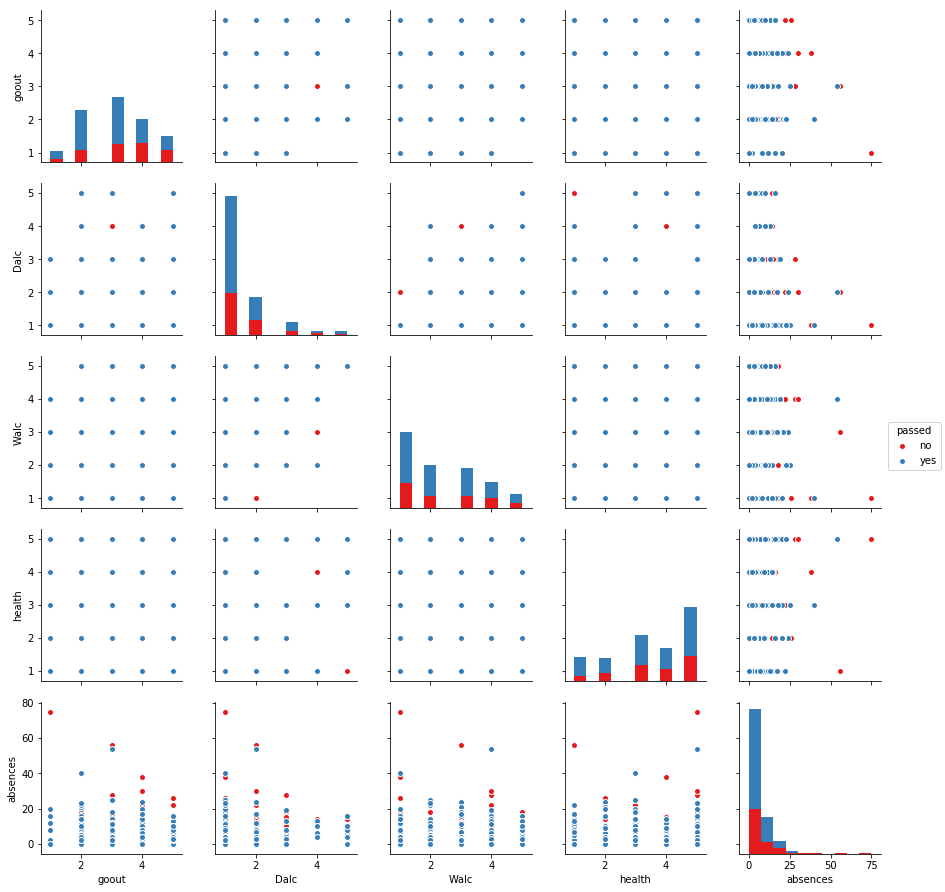

In [23]:
import seaborn as sns

sns.pairplot(student_data.iloc[:, 25:], palette='Set1', hue='passed')

## Treinando e Avaliando Modelos
Nesta seção, você irá escolher 3 modelos de aprendizagem supervisionada que sejam apropriados para esse problema e que estejam disponíveis no `scikit-learn`. Primeiro você irá discutir o raciocínio por trás da escolha desses três modelos considerando suas vantagens e desvantagens e o que você sabe sobre os dados. Depois você irá ajustar o modelo a diferentes tamanhos de conjuntos de treinamento (com 100, 200 e 300 pontos) e medir a pontuação F<sub>1</sub>. Você vai precisar preencher três tabelas (uma para cada modelo) que mostrem o tamanho do conjunto de treinamento, o tempo de treinamento, o tempo de previsão e a pontuação F<sub>1</sub> no conjunto de treinamento.

**Os seguintes modelos de aprendizagem supervisionada estão atualmente disponíveis no **[`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)** para você escolher:**
- Gaussian Naive Bayes (GaussianNB)
- Árvores de Decisão
- Métodos de agregação (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Método do gradiente estocástico (SGDC)
- Máquinas de vetores de suporte (SVM)
- Regressão logística

### Questão 2 - Aplicação dos Modelos
*Liste três modelos de aprendizagem supervisionada que são apropriadas para esse problema. Para cada modelo escolhido:*
- Descreva uma aplicação em mundo real na indústria em que o modelo pode ser aplicado. *(Talvez você precise fazer um pouco de pesquisa para responder essa questão – dê as devidas referências!)* 
- Quais são as vantagens do modelo; quando ele tem desempenho melhor? 
- Quais são as desvantagens do modelo, quando ele tem desempenho pior?
- O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?

**Resposta: **

### - **SVC**

Vantagens:
- Classificação binária, maximiza a separação entre duas classes.
- Robusto em problemas onde existe grande dimensionalidade.
- Uso dos kernels para separar classes que não sejam linearmente separáveis.

Desvantagens:
- Leva mais tempo que outros classificadores na etapa de treinamento.
- Maior análise dos dados para a escolha da função kernel.


Como o SVC é um conjunto de métodos que analisam os dados e reconhecem padrões, e pode ser usado para problemas de classificação, e o fato de ser uma alternativa de separação para dados não lineares e a quantidade de amostra não sobrecarregar o SVC foi escolhido para estar entre os candidatos.

Aplicações:
    - Detecção de genero baseada em imagem.
    - Classificação de imagem em grande escala.

Fonte: http://www.semantix.com.br/10-algoritmos-de-machine-learning/

  
  
### - **Regressão Logistica**

Vantagens:
- Interpretação probabilistica fácil.
- Pode ser normalizado para evitar sobreajuste.
- Ráido para treinar.
- Funciona bem com uma amostra pequena.

Desvantagens:
- Problema ao lidar com dados que contenha ruídos.
- Não é flexivel com relacionamentos mais complexos.

Por termos poucas amostrar para treinar e é um modelo simples que funciona bem com a quantidade de amostras que temos, é rápido para treinar e prever resultados, se tornou um dos candidatos.

Aplicações:
- Pontuação de crédito.
- Mediar as taxas de sucesso das camapanhas de marketing.
- Prever as receitas de um determinado produto.
- Haverá um terremoto em um determinado dia?
    
Fonte: http://www.semantix.com.br/10-algoritmos-de-machine-learning/
  
  
### - **Arvore de decisão**

Vantagens:
- Fácil aplicabilidade e explicabilidade.
- Normalmente não requer a normalização dos dados.
- Consegue lidar com valores faltantes, categóricos e númericos.
- Capaz de lidar com problemas com múltiplos rótulos.

Desvantagens:
- Propenso a sobreajustar os dados, especialmente quando há muitas features.
- É um modelo instável, pequenas variáções nos dados de treino pode resultar em arvores completamente distintas.

Por se conceitualmente simples e poderosa, requerendo pouco esforço na preparação dos dados, e o fato dos valores da função alvo ser discreto e as instâncias serem descritas por pares de atributo-valor, coloquei esse algoritmo como um dos candidatos a implementação.

Aplicações:
- Diagnóstico médico.
- Diagnóstico de equipamentos.
- Análise de crédito.
- Análise de compra e venda.

Fonte: https://pt.slideshare.net/myrmonica/rvores-de-deciso


### Configuração
Execute a célula de código abaixo para inicializar três funções de ajuda que você pode utilizar para treinar e testar os três modelos de aprendizagem supervisionada que você escolheu acima. As funções são as seguintes:
- `train_classifier` - recebe como parâmetro um classificador e dados de treinamento e ajusta o classificador aos dados.
- `predict_labels` - recebe como parâmetro um classificador ajustado, atributos e rótulo alvo e faz estimativas utilizando a pontuação do F<sub>1</sub>.
- `train_predict` - recebe como entrada um classificador, e dados de treinamento e teste, e executa `train_clasifier` e `predict_labels`.
 - Essa função vai dar a pontuação F<sub>1</sub> tanto para os dados de treinamento como para os de teste, separadamente.

In [6]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print "O modelo foi treinado em {:.4f} segundos".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print "As previsões foram feitas em {:.4f} segundos.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print "Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train))
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train)
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print "Pontuação F1 para o conjunto de treino: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "Pontuação F1 para o conjunto de teste: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementação: Métricas de Desempenho do Modelo
Com as funções acima, você vai importar os três modelos de aprendizagem supervisionada de sua escolha e executar a função `train_prediction` para cada um deles. Lembre-se de que você vai precisar treinar e usar cada classificador para três diferentes tamanhos de conjuntos de treinamentos: 100, 200 e 300 pontos. Então você deve ter 9 saídas diferentes abaixo – 3 para cada modelo utilizando cada tamanho de conjunto de treinamento. Na célula de código a seguir, você deve implementar o seguinte:
- Importe os três modelos de aprendizagem supervisionada que você escolheu na seção anterior.
- Inicialize os três modelos e armazene eles em `clf_A`, `clf_B` e `clf_C`.
 - Defina um `random_state` para cada modelo, se a opção existir.
 - **Nota:** Utilize as configurações padrão para cada modelo – você vai calibrar um modelo específico em uma seção posterior.
- Crie diferentes tamanhos de conjuntos de treinamento para treinar cada modelo.
 - *Não embaralhe e distribua novamente os dados! Os novos pontos de treinamento devem ser tirados de `X_train` e `y_train`.*
- Treine cada modelo com cada tamanho de conjunto de treinamento e faça estimativas com o conjunto de teste (9 vezes no total).  
**Nota:** Três tabelas são fornecidas depois da célula de código a seguir, nas quais você deve anotar seus resultados.

In [27]:
# TODO: Importe os três modelos de aprendizagem supervisionada do sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree


# TODO: Inicialize os três modelos
clf_A = SVC(random_state=10)
clf_B = LogisticRegression(random_state=10)
clf_C = tree.DecisionTreeClassifier(random_state=10)


# TODO: Configure os tamanho dos conjuntos de treinamento
'''
print ''
print ''
print 'Modelo SVC:'
for n in [100, 200, 300]:
    train_predict(clf_A, X_train[:n], y_train[:n], X_test, y_test)
    print ''

print ''
print ''
print 'Modelo Regressão logistica:'
for n in [100, 200, 300]:
    train_predict(clf_B, X_train[:n], y_train[:n], X_test, y_test)
    print ''

print ''
print ''
print 'Modelo Arvore de decisão:'
for n in [100, 200, 300]:
    train_predict(clf_C, X_train[:n], y_train[:n], X_test, y_test)
    print ''
'''

for clf in [clf_A, clf_B, clf_C]:
    for size in [100, 200, 300]:
        train_predict(clf, X_train[:size], y_train[:size], X_test, y_test)
        print ''
    print '='*100 # imprime linha


# TODO: Executar a função 'train_predict' para cada classificador e cada tamanho de conjunto de treinamento
# train_predict(clf, X_train, y_train, X_test, y_test)

Treinando um SVC com 100 pontos de treinamento. . .
O modelo foi treinado em 0.0021 segundos
As previsões foram feitas em 0.0011 segundos.
Pontuação F1 para o conjunto de treino: 0.8354.
As previsões foram feitas em 0.0013 segundos.
Pontuação F1 para o conjunto de teste: 0.8025.

Treinando um SVC com 200 pontos de treinamento. . .
O modelo foi treinado em 0.0053 segundos
As previsões foram feitas em 0.0039 segundos.
Pontuação F1 para o conjunto de treino: 0.8431.
As previsões foram feitas em 0.0024 segundos.
Pontuação F1 para o conjunto de teste: 0.8105.

Treinando um SVC com 300 pontos de treinamento. . .
O modelo foi treinado em 0.0091 segundos
As previsões foram feitas em 0.0064 segundos.
Pontuação F1 para o conjunto de treino: 0.8664.
As previsões foram feitas em 0.0023 segundos.
Pontuação F1 para o conjunto de teste: 0.8052.

Treinando um LogisticRegression com 100 pontos de treinamento. . .
O modelo foi treinado em 0.0015 segundos
As previsões foram feitas em 0.0003 segundos.
Pon

### Resultados em tabelas
Edite a célula abaixo e veja como a tabela pode ser desenhada em [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). Você deve salvar seus resultados abaixo nas tabelas fornecidas.

** Classificador 1 - SVM**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |          0.0021            |             0.0013                |                  0.8354          |             0.8025         |
| 200                                |       0.0053        |                0.0024             |           0.8431                 |         0.8105             |
| 300                                |        0.0091              |          0.0023                   |         0.8664                   |        0.8052       |

** Classificador 2 - Regressão Logistica**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |         0.0015             |                0.0003             |         0.8671                   |      0.7068                |
| 200                                |       0.0032        |               0.0004              |      0.8211                      |         0.7391             |
| 300                               |    0.0052                  |               0.0003              |       0.8512                     |        0.7500       |

** Classificador 3 - Arvore de decisão**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |  0.0015                    |        0.0004                     |     1.0                       |           0.6452           |
| 200                                |         0.0026            |     0.0005                        |      1.0                      |          0.7258            |         
| 300                                |         0.0033             |          0.0004                   |        1.0                    |           0.6838           |

## Escolhendo o Melhor Modelo
Nesta seção final, você irá escolher dos três modelos de aprendizagem supervisionada o *melhor* para utilizar os dados dos estudantes. Você então executará um busca em matriz otimizada para o modelo em todo o conjunto de treinamento (`X_train` e `y_train`) ao calibrar pelo menos um parâmetro, melhorando em comparação a pontuação F<sub>1</sub> do modelo não calibrado. 

### Questão 3 - Escolhendo o Melhor Modelo
*Baseando-se nos experimentos que você executou até agora, explique em um ou dois parágrafos ao conselho de supervisores qual modelo que você escolheu como o melhor. Qual modelo é o mais apropriado baseado nos dados disponíveis, recursos limitados, custo e desempenho?*

**Resposta: **  

Baseado nos experimentos realizado o melhor modelo foi o SVM, que obteve score bastante semelhantes mesmo alterando o tamanho do conjunto de dados e também a maior score dentre os outros modelos testados. Embora a performance tenha sido inferior em comparação aos outros modelos, este algoritmo foi escolhido por ter um F1 score equilibrado entre os treinamentos e testes em todos os conjuntos.

### Questão 4 – O Modelo para um Leigo
*Em um ou dois parágrafos, explique para o conselho de supervisores, utilizando termos leigos, como o modelo final escolhido deve trabalhar. Tenha certeza que você esteja descrevendo as melhores qualidades do modelo, por exemplo, como o modelo é treinado e como ele faz uma estimativa. Evite jargões técnicos ou matemáticos, como descrever equações ou discutir a implementação do algoritmo.*

**Resposta: **

O modelo escolhido foi SVM(Máquina de vetores de suporte), que é um conjunto de métodos de aprendizado supervisionado que analisam os dados e reconhecem padrões, usado para classificação e análise de regressão, ele trabalha muito bem com classificação de conjuntos de dados separando em duas classes, que no nosso caso seria fazer a intervenção ao estudante ou não.

Esse algoritmo utiliza as amostras que ficam a margem da fronteira entre as duas classes, ignorando os outliers, e também é possivel criar dois planos para separar linearmente as classes, mesmo a separação não ser linear, alterando a função kernel do algoritmo.

### Implementação: Calibrando o Modelo (_Tuning_)
Calibre o modelo escolhido. Utilize busca em matriz (`GridSearchCV`) com, pelo menos, um parâmetro importante calibrado com, pelo menos, 3 valores diferentes. Você vai precisar utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você deve implementar o seguinte:
- Importe [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Crie o dicionário de parâmetros que você deseja calibrar para o modelo escolhido.
 - Examplo: `parameters = {'parameter' : [list of values]}`.
- Inicialize o classificador que você escolheu e armazene-o em `clf`.
- Crie a função de pontuação F<sub>1</sub> utilizando `make_scorer` e armazene-o em `f1_scorer`.
 - Estabeleça o parâmetro `pos_label` para o valor correto!
- Execute uma busca em matriz no classificador `clf` utilizando o `f1_scorer` como método de pontuação e armazene-o em `grid_obj`.
- Treine o objeto de busca em matriz com os dados de treinamento (`X_train`, `y_train`) e armazene-o em `grid_obj`.

In [17]:

# TODO: Importe 'GridSearchCV' e 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score


# TODO: Crie a lista de parâmetros que você gostaria de calibrar
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C':[0.1, 1, 10]
}

# TODO: Inicialize o classificador
clf = SVC(random_state=0)

# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer'
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Execute uma busca em matriz no classificador utilizando o f1_scorer
# como método de pontuação
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=f1_scorer)


# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e
# encontre os parâmetros ótimos
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os
# parâmetros print "Tuned model has a training F1 score of {:.4f}.".format(
# predict_labels(clf, X_train, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(
    predict_labels(clf, X_train, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(
    predict_labels(clf, X_test, y_test))


As previsões foram feitas em 0.0061 segundos.
O modelo calibrado tem F1 de 0.8664 no conjunto de treinamento.
As previsões foram feitas em 0.0022 segundos.
O modelo calibrado tem F1 de 0.8052 no conjunto de teste.


Text(0.5,24,u'Predicted')

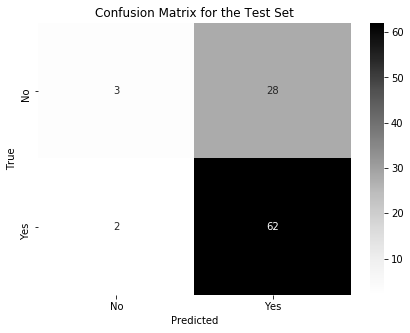

In [11]:
import seaborn as sns # Install using 'pip install seaborn'
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

cm_test = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(7,5))
sns.heatmap(cm_test, annot=True, cmap='Greys', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for the Test Set')
plt.ylabel('True')
plt.xlabel('Predicted')

### Questão 5 - Pontuação F<sub>1</sub> Final
*Qual é a pontuação F<sub>1</sub> do modelo final para treinamento e teste? Como ele se compara ao modelo que não foi calibrado?*

**Resposta: **

A pontuação no conjunto de treinamento é de 0.8664 e no de testes 0.8052, não houve mudanças na pontuação após a calibração.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando o iPython Nothebook como um document HTML. Você pode fazer isso utilizando o menu acima e navegando para  
**File -> Download as -> HTML (.html)**. Inclua a documentação final junto com o notebook para o envio do seu projeto.